In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here we can implement the bisection method

In [2]:
def Bisection(f,a,b,M,delta,eps):
    ##### Try to find zero of continuous function f(x) using bisection method
    ## a and b are endpoints of interval
    ##      f(a),f(b) should have opposite signs
    ## M is maximum number of iterations
    ## delta is error threshold in x-coordinate
    ## eps is error threshold in y-coordinate
    
    ## Evaluate function at endpoints and check signs
    u = f(a)
    v = f(b)
    assert(a < b and np.sign(u) != np.sign(v))
    e = b-a
    
    ## Main loop
    for n in range(M):
        ## Evaluate at midpoint
        e = e / 2
        c = (a + e)
        w = f(c)
        
        ## Check termination criteria
        if (abs(e) < delta or abs(w) < eps):
            return c
        else:
            ## Repeat on subinterval
            if (np.sign(w) != np.sign(u)):
                ## Use [a,c] as new interval
                b = c
                v = w
            else:
                ## Use [c,b] as new interval
                a = c
                u = w
    
    return c    

Let's try to use it to find the roots of a quadratic equation $x^2-x-1 = 0$

In [3]:
def f(x):
    return x**2-x-1

In [4]:
delta = 1e-10
eps = 1e-10
a = 1
b = 2
M = 10000
c = Bisection(f,a,b,M,delta,eps)
print(c)
print(f(c))

1.6180339887505397
1.4419576643831533e-12


So we found the root $\phi = \frac{1+\sqrt{5}}{2}$ up to an accuracy of ~10 decimal places

In [5]:
phi =(1+np.sqrt(5))/2
print(phi)
print(f(phi))


1.618033988749895
0.0


Plot results

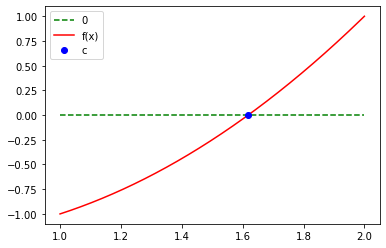

In [6]:
x = np.linspace(1,2,1000)
y = f(x)
[ax,fig] = plt.subplots()
plt.plot(x,np.zeros(1000),'g--', label='0')
plt.plot(x,y,'r', label='f(x)')
plt.plot(c,f(c),'bo', label = 'c')
plt.legend()
plt.show()